In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
pd.unique(df[['Species']].values.ravel())

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
target_encoded_values = {"Species": {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}}
df = df.replace(target_encoded_values)
# df.head()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Splitting data into training and testing part

In [11]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [12]:
unorganized = df.sample(frac=1, random_state=1)
unorganized.shape

(150, 5)

In [13]:
unorganized.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2
56,6.3,3.3,4.7,1.6,1
141,6.9,3.1,5.1,2.3,2
44,5.1,3.8,1.9,0.4,0
29,4.7,3.2,1.6,0.2,0
120,6.9,3.2,5.7,2.3,2


In [14]:
train = unorganized.iloc[:int(0.7*len(unorganized)), :]
train.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2
56,6.3,3.3,4.7,1.6,1
141,6.9,3.1,5.1,2.3,2
44,5.1,3.8,1.9,0.4,0
29,4.7,3.2,1.6,0.2,0
120,6.9,3.2,5.7,2.3,2


In [15]:
print(train.shape)

(105, 5)


In [16]:
test = unorganized.iloc[int(0.7*len(unorganized)): , :]
test.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
26,5.0,3.4,1.6,0.4,0
76,6.8,2.8,4.8,1.4,1
43,5.0,3.5,1.6,0.6,0
24,4.8,3.4,1.9,0.2,0
136,6.3,3.4,5.6,2.4,2
121,5.6,2.8,4.9,2.0,2
143,6.8,3.2,5.9,2.3,2
49,5.0,3.3,1.4,0.2,0
21,5.1,3.7,1.5,0.4,0
70,5.9,3.2,4.8,1.8,1


In [17]:
print(test.shape)

(45, 5)


## Splitting the dataset into feature and target variables, for both training and testing part.

In [18]:
#for feature variables in training and testing dataset
X_train = train.iloc[:, :4]
X_test = test.iloc[:, :4]

#for target variables in training and testing dataset
y_train = train.iloc[:, 4:]
y_test = test.iloc[:, 4:]

In [19]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


Looking at the X, we see that there are 4 main features in it. Now we create a First layer with weight matrix which includes 4 feautures and 3 nodes 

In [20]:
def initialize_weights_and_bias(mode):
    if mode == 'random':
        W1 = np.random.random((3, 4)).astype(np.float32)
        b1 = np.random.random((1, 3)).astype(np.float32)
        W2 = np.random.random((3, 3)).astype(np.float32)
        b2 = np.random.random((1, 3)).astype(np.float32)
    elif mode == 'xavier':
        W1 = np.random.normal(loc=0.0, scale=(2/(4+3)), size=(3, 4)).astype(np.float32)
        b1 = np.random.random((1, 3)).astype(np.float32)
        W2 = np.random.normal(loc=0.0, scale=(2/(3+3)), size=(3, 3)).astype(np.float32)
        b2 = np.random.random((1, 3)).astype(np.float32)
    elif mode == 'constant':
        W1 = np.ones((3, 4))
        b1 = np.ones((1, 3))
        W2 = np.ones((3, 3))
        b2 = np.ones((1, 3))
    return W1, b1, W2, b2

In [22]:
#Activation Functions
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1)

def tanh(x):
    return math.tanh(x)



In [23]:
def forward_pass(x, W1, b1, W2, b2):
    
    #First layer
    x = np.array(x, dtype=np.float32)
    res1 = np.matmul(x, W1.T) + b1
    layer1_out = sigmoid(res1)
    # print(layer1_out)
    
    #Second layer
    res2 = np.matmul(layer1_out, W2.T) + b2
    layer2_out = softmax(res2)
    #print(layer2_out)
    return layer2_out.flatten(), layer1_out.flatten()

In [24]:
def backward_pass(x, W1, b1, W2, b2, y_hat, y, z1, lr = 0.001):
    x = np.array(x, dtype= np.float32).reshape(1,4)
    y = np.array(y, dtype = np.float32).reshape(1,3)
    y_hat = np.array(y_hat, dtype=np.float32).reshape(1,3)
    #print(y.shape)
    #print(y_hat.shape)
    z1 = np.array(z1, dtype=np.float32).reshape(1,3)
    #print(z1.shape)
    res = y_hat - y                                                            # 1x3 - 1x3 = 1x3
    # print(res.shape)
    
    
    dw2 = np.matmul(res.T, z1)                                                # 3x1 * 1x3 = 3x3
    db2 = res                                                                 # 1x3
    #print(dw2.shape)
    #print(db2.shape)
#     print(grad_w1.shape, np.expand_dims((1-z1), axis=-1).shape)             
    grad_w1 = np.matmul(res, W2)                                              # 1x3 * 3x3 = 1x3 
    #print(grad_w1.shape)
    grad_w1 = np.matmul(grad_w1, z1.T)                                        # 1x3 * 3x1 = 1x1
    grad_w2 = 1 - z1                                                          # 1x3
    db1 = np.matmul(grad_w1, grad_w2)                                         # 1x1 * 1x3 = 1x3
    #print(db1)
    #print(db1.shape)
#     print(db1.shape, np.expand_dims(x.flatten(), axis=-1).T.shape)
    dw1 = np.matmul(db1.T, x)                                                 # 3x1 * 1x4 = 3x4
#     print(dw1.shape)
    
    up_W2 = W2 - lr*dw2
    up_b2 = b2 - lr*db2
    up_b1 = b1 - lr*db1
    up_W1 = W1 - lr*dw1
    
    return up_W2, up_b2, up_W1, up_b1
    

In [25]:
X_train = np.array(X_train)
print(X_train)

[[5.8 4.  1.2 0.2]
 [5.1 2.5 3.  1.1]
 [6.6 3.  4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2. ]
 [6.3 3.3 4.7 1.6]
 [6.9 3.1 5.1 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [5.6 2.7 4.2 1.3]
 [5.4 3.9 1.7 0.4]
 [7.1 3.  5.9 2.1]
 [6.4 3.2 4.5 1.5]
 [6.  2.9 4.5 1.5]
 [4.4 3.2 1.3 0.2]
 [5.8 2.6 4.  1.2]
 [5.6 3.  4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [5.  3.2 1.2 0.2]
 [5.5 2.6 4.4 1.2]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.  3.5 1.3 0.3]
 [7.2 3.2 6.  1.8]
 [5.7 2.8 4.1 1.3]
 [5.5 4.2 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [6.1 2.8 4.7 1.2]
 [6.3 2.5 5.  1.9]
 [6.1 3.  4.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.2 3.4 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]
 [6.3 2.9 5.6 1.8]
 [6.6 2.9 4.6 1.3]
 [7.7 2.6 6.9 2.3]
 [5.7 3.8 1.7 0.3]
 [5.  3.6 1.4 0.2]
 [4.8 3.  1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.

In [26]:
y_train = np.array(y_train)
print(y_train)

[[0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [2]
 [1]
 [0]
 [0]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [0]
 [1]
 [0]
 [1]
 [2]
 [2]
 [0]
 [2]
 [2]
 [1]
 [2]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [0]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [0]
 [0]
 [0]
 [2]
 [0]
 [1]
 [2]
 [2]
 [0]
 [0]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]


In [27]:
# print("Predicted Class | Actual Class")
import matplotlib.pyplot as plt


W1, b1, W2, b2 = initialize_weights_and_bias('random')
cost = 0
losses = []
epochs = 5000
#print(W2)
for j in range(epochs):
    losss = 0
    tp = 0
    for i in range(len(X_train)):
        
        x = np.array(X_train[i], dtype=np.float32).reshape(1,4)  #1x4
        target = np.array(y_train[i])
        y = []
        if target == 0:
            y = [1, 0, 0]
        elif target == 1:
            y = [0, 1, 0]
        elif target == 2:
            y = [0, 0, 1]


        #network forward pass
        y_hat, z1 = forward_pass(x, W1, b1, W2, b2)
        
        loss = 0
        #let/s work for the loss now
        #we use categorical cross entropy loss
        loss = np.sum(y * np.log(y_hat))
        #for i in range(len(y)):
        #    loss +=  y[i] * np.log(y_hat[i])
    #     cost += loss
        losss -= loss
        index = np.argmax(y_hat)
        if index == target:
            tp = tp + 1
        W2, b2, W1, b1 = backward_pass(x, W1, b1, W2, b2, y_hat, y, z1)
#     print(W2)
    losses.append(losss)
    print(f"epoch = {j}, Accuracy = {tp/len(X_train)}, loss= {losss}")
print(W2)



epoch = 0, Accuracy = 0.3333333333333333, loss= 126.11237329244614
epoch = 1, Accuracy = 0.3333333333333333, loss= 123.57451963424683
epoch = 2, Accuracy = 0.3333333333333333, loss= 121.61283510923386
epoch = 3, Accuracy = 0.3333333333333333, loss= 120.09899312257767
epoch = 4, Accuracy = 0.3333333333333333, loss= 118.93266153335571
epoch = 5, Accuracy = 0.3333333333333333, loss= 118.03549993038177
epoch = 6, Accuracy = 0.3333333333333333, loss= 117.34638196229935
epoch = 7, Accuracy = 0.3333333333333333, loss= 116.81768876314163
epoch = 8, Accuracy = 0.3333333333333333, loss= 116.4123802781105
epoch = 9, Accuracy = 0.3333333333333333, loss= 116.10170781612396
epoch = 10, Accuracy = 0.3333333333333333, loss= 115.86343425512314
epoch = 11, Accuracy = 0.3333333333333333, loss= 115.680389046669
epoch = 12, Accuracy = 0.3333333333333333, loss= 115.53936159610748
epoch = 13, Accuracy = 0.3333333333333333, loss= 115.4302008152008
epoch = 14, Accuracy = 0.3333333333333333, loss= 115.345139741

epoch = 123, Accuracy = 0.5238095238095238, loss= 107.71402221918106
epoch = 124, Accuracy = 0.5428571428571428, loss= 107.58996540307999
epoch = 125, Accuracy = 0.580952380952381, loss= 107.46586775779724
epoch = 126, Accuracy = 0.5904761904761905, loss= 107.34177601337433
epoch = 127, Accuracy = 0.6, loss= 107.21773076057434
epoch = 128, Accuracy = 0.6190476190476191, loss= 107.09376955032349
epoch = 129, Accuracy = 0.6190476190476191, loss= 106.96993964910507
epoch = 130, Accuracy = 0.6285714285714286, loss= 106.84627664089203
epoch = 131, Accuracy = 0.638095238095238, loss= 106.72281748056412
epoch = 132, Accuracy = 0.638095238095238, loss= 106.59960407018661
epoch = 133, Accuracy = 0.638095238095238, loss= 106.476666867733
epoch = 134, Accuracy = 0.6476190476190476, loss= 106.35404098033905
epoch = 135, Accuracy = 0.6571428571428571, loss= 106.23176074028015
epoch = 136, Accuracy = 0.6571428571428571, loss= 106.10985559225082
epoch = 137, Accuracy = 0.6571428571428571, loss= 105.9

epoch = 265, Accuracy = 0.6666666666666666, loss= 94.49988317489624
epoch = 266, Accuracy = 0.6666666666666666, loss= 94.42852967977524
epoch = 267, Accuracy = 0.6666666666666666, loss= 94.35732138156891
epoch = 268, Accuracy = 0.6666666666666666, loss= 94.28627133369446
epoch = 269, Accuracy = 0.6666666666666666, loss= 94.21536302566528
epoch = 270, Accuracy = 0.6666666666666666, loss= 94.14460563659668
epoch = 271, Accuracy = 0.6666666666666666, loss= 94.07399272918701
epoch = 272, Accuracy = 0.6666666666666666, loss= 94.00352972745895
epoch = 273, Accuracy = 0.6666666666666666, loss= 93.93320661783218
epoch = 274, Accuracy = 0.6666666666666666, loss= 93.86303740739822
epoch = 275, Accuracy = 0.6666666666666666, loss= 93.7930114865303
epoch = 276, Accuracy = 0.6666666666666666, loss= 93.72313112020493
epoch = 277, Accuracy = 0.6666666666666666, loss= 93.65339994430542
epoch = 278, Accuracy = 0.6666666666666666, loss= 93.58381289243698
epoch = 279, Accuracy = 0.6666666666666666, loss=

epoch = 387, Accuracy = 0.6666666666666666, loss= 86.78531002998352
epoch = 388, Accuracy = 0.6666666666666666, loss= 86.72962027788162
epoch = 389, Accuracy = 0.6666666666666666, loss= 86.67405414581299
epoch = 390, Accuracy = 0.6666666666666666, loss= 86.61859911680222
epoch = 391, Accuracy = 0.6666666666666666, loss= 86.56324982643127
epoch = 392, Accuracy = 0.6666666666666666, loss= 86.5080104470253
epoch = 393, Accuracy = 0.6666666666666666, loss= 86.45289349555969
epoch = 394, Accuracy = 0.6666666666666666, loss= 86.39788967370987
epoch = 395, Accuracy = 0.6666666666666666, loss= 86.34300005435944
epoch = 396, Accuracy = 0.6666666666666666, loss= 86.28821474313736
epoch = 397, Accuracy = 0.6666666666666666, loss= 86.23353910446167
epoch = 398, Accuracy = 0.6666666666666666, loss= 86.17897301912308
epoch = 399, Accuracy = 0.6666666666666666, loss= 86.12452501058578
epoch = 400, Accuracy = 0.6666666666666666, loss= 86.07019621133804
epoch = 401, Accuracy = 0.6666666666666666, loss=

epoch = 529, Accuracy = 0.6666666666666666, loss= 79.91232073307037
epoch = 530, Accuracy = 0.6666666666666666, loss= 79.87060934305191
epoch = 531, Accuracy = 0.6666666666666666, loss= 79.82898908853531
epoch = 532, Accuracy = 0.6666666666666666, loss= 79.78744778037071
epoch = 533, Accuracy = 0.6666666666666666, loss= 79.74599501490593
epoch = 534, Accuracy = 0.6666666666666666, loss= 79.7046249806881
epoch = 535, Accuracy = 0.6666666666666666, loss= 79.66333103179932
epoch = 536, Accuracy = 0.6666666666666666, loss= 79.62212428450584
epoch = 537, Accuracy = 0.6666666666666666, loss= 79.58100363612175
epoch = 538, Accuracy = 0.6666666666666666, loss= 79.53995895385742
epoch = 539, Accuracy = 0.6666666666666666, loss= 79.49900242686272
epoch = 540, Accuracy = 0.6666666666666666, loss= 79.45814087986946
epoch = 541, Accuracy = 0.6666666666666666, loss= 79.4173512160778
epoch = 542, Accuracy = 0.6666666666666666, loss= 79.37664905190468
epoch = 543, Accuracy = 0.6666666666666666, loss= 

epoch = 673, Accuracy = 0.6666666666666666, loss= 74.6880350112915
epoch = 674, Accuracy = 0.6666666666666666, loss= 74.65668576955795
epoch = 675, Accuracy = 0.6666666666666666, loss= 74.62540081143379
epoch = 676, Accuracy = 0.6666666666666666, loss= 74.59417170286179
epoch = 677, Accuracy = 0.6666666666666666, loss= 74.56300336122513
epoch = 678, Accuracy = 0.6666666666666666, loss= 74.53189626336098
epoch = 679, Accuracy = 0.6666666666666666, loss= 74.5008529573679
epoch = 680, Accuracy = 0.6666666666666666, loss= 74.469871327281
epoch = 681, Accuracy = 0.6666666666666666, loss= 74.43894566595554
epoch = 682, Accuracy = 0.6666666666666666, loss= 74.4080725312233
epoch = 683, Accuracy = 0.6666666666666666, loss= 74.37725315988064
epoch = 684, Accuracy = 0.6666666666666666, loss= 74.34650106728077
epoch = 685, Accuracy = 0.6666666666666666, loss= 74.31581653654575
epoch = 686, Accuracy = 0.6666666666666666, loss= 74.2851965278387
epoch = 687, Accuracy = 0.6666666666666666, loss= 74.2

epoch = 796, Accuracy = 0.6666666666666666, loss= 71.24717265367508
epoch = 797, Accuracy = 0.6666666666666666, loss= 71.22230237722397
epoch = 798, Accuracy = 0.6666666666666666, loss= 71.19749779999256
epoch = 799, Accuracy = 0.6666666666666666, loss= 71.17274487018585
epoch = 800, Accuracy = 0.6666666666666666, loss= 71.14803020656109
epoch = 801, Accuracy = 0.6666666666666666, loss= 71.12335319817066
epoch = 802, Accuracy = 0.6666666666666666, loss= 71.09872341156006
epoch = 803, Accuracy = 0.6666666666666666, loss= 71.0741518586874
epoch = 804, Accuracy = 0.6666666666666666, loss= 71.04962094128132
epoch = 805, Accuracy = 0.6666666666666666, loss= 71.02511627972126
epoch = 806, Accuracy = 0.6666666666666666, loss= 71.00067016482353
epoch = 807, Accuracy = 0.6666666666666666, loss= 70.9762644469738
epoch = 808, Accuracy = 0.6666666666666666, loss= 70.95190390944481
epoch = 809, Accuracy = 0.6666666666666666, loss= 70.92758831381798
epoch = 810, Accuracy = 0.6666666666666666, loss= 

epoch = 920, Accuracy = 0.6666666666666666, loss= 68.48266042768955
epoch = 921, Accuracy = 0.6666666666666666, loss= 68.46272884309292
epoch = 922, Accuracy = 0.6666666666666666, loss= 68.4428392201662
epoch = 923, Accuracy = 0.6666666666666666, loss= 68.42298525571823
epoch = 924, Accuracy = 0.6666666666666666, loss= 68.40316370129585
epoch = 925, Accuracy = 0.6666666666666666, loss= 68.3833646029234
epoch = 926, Accuracy = 0.6666666666666666, loss= 68.36361464858055
epoch = 927, Accuracy = 0.6666666666666666, loss= 68.34389980137348
epoch = 928, Accuracy = 0.6666666666666666, loss= 68.32421196997166
epoch = 929, Accuracy = 0.6666666666666666, loss= 68.3045405447483
epoch = 930, Accuracy = 0.6666666666666666, loss= 68.28492359817028
epoch = 931, Accuracy = 0.6666666666666666, loss= 68.26534560322762
epoch = 932, Accuracy = 0.6666666666666666, loss= 68.24580523371696
epoch = 933, Accuracy = 0.6666666666666666, loss= 68.22628617286682
epoch = 934, Accuracy = 0.6666666666666666, loss= 6

epoch = 1042, Accuracy = 0.6666666666666666, loss= 66.28481099009514
epoch = 1043, Accuracy = 0.6666666666666666, loss= 66.26856664568186
epoch = 1044, Accuracy = 0.6666666666666666, loss= 66.25237050652504
epoch = 1045, Accuracy = 0.6666666666666666, loss= 66.23620077222586
epoch = 1046, Accuracy = 0.6666666666666666, loss= 66.22003765404224
epoch = 1047, Accuracy = 0.6666666666666666, loss= 66.20390057563782
epoch = 1048, Accuracy = 0.6666666666666666, loss= 66.18779580295086
epoch = 1049, Accuracy = 0.6666666666666666, loss= 66.17171590775251
epoch = 1050, Accuracy = 0.6666666666666666, loss= 66.15566757321358
epoch = 1051, Accuracy = 0.6666666666666666, loss= 66.13963543623686
epoch = 1052, Accuracy = 0.6666666666666666, loss= 66.12363135814667
epoch = 1053, Accuracy = 0.6666666666666666, loss= 66.10765644907951
epoch = 1054, Accuracy = 0.6666666666666666, loss= 66.09169121831656
epoch = 1055, Accuracy = 0.6666666666666666, loss= 66.07578045129776
epoch = 1056, Accuracy = 0.6666666

epoch = 1163, Accuracy = 0.6666666666666666, loss= 64.49600927531719
epoch = 1164, Accuracy = 0.6666666666666666, loss= 64.48259097337723
epoch = 1165, Accuracy = 0.6666666666666666, loss= 64.46918611973524
epoch = 1166, Accuracy = 0.6666666666666666, loss= 64.45580116659403
epoch = 1167, Accuracy = 0.6666666666666666, loss= 64.44244084507227
epoch = 1168, Accuracy = 0.6666666666666666, loss= 64.42910029739141
epoch = 1169, Accuracy = 0.6666666666666666, loss= 64.41577783226967
epoch = 1170, Accuracy = 0.6666666666666666, loss= 64.40247041732073
epoch = 1171, Accuracy = 0.6666666666666666, loss= 64.38918150216341
epoch = 1172, Accuracy = 0.6666666666666666, loss= 64.37592807412148
epoch = 1173, Accuracy = 0.6666666666666666, loss= 64.36269676685333
epoch = 1174, Accuracy = 0.6666666666666666, loss= 64.34947564452887
epoch = 1175, Accuracy = 0.6666666666666666, loss= 64.33626611530781
epoch = 1176, Accuracy = 0.6666666666666666, loss= 64.32308032363653
epoch = 1177, Accuracy = 0.6666666

epoch = 1285, Accuracy = 0.6666666666666666, loss= 62.997605822980404
epoch = 1286, Accuracy = 0.6666666666666666, loss= 62.98639336973429
epoch = 1287, Accuracy = 0.6666666666666666, loss= 62.97519867122173
epoch = 1288, Accuracy = 0.6666666666666666, loss= 62.96401333808899
epoch = 1289, Accuracy = 0.6666666666666666, loss= 62.95285367965698
epoch = 1290, Accuracy = 0.6666666666666666, loss= 62.941698007285595
epoch = 1291, Accuracy = 0.6666666666666666, loss= 62.9305614978075
epoch = 1292, Accuracy = 0.6666666666666666, loss= 62.91944796591997
epoch = 1293, Accuracy = 0.6666666666666666, loss= 62.908335365355015
epoch = 1294, Accuracy = 0.6666666666666666, loss= 62.8972517028451
epoch = 1295, Accuracy = 0.6666666666666666, loss= 62.886172376573086
epoch = 1296, Accuracy = 0.6666666666666666, loss= 62.87511745840311
epoch = 1297, Accuracy = 0.6666666666666666, loss= 62.86407916992903
epoch = 1298, Accuracy = 0.6666666666666666, loss= 62.853060968220234
epoch = 1299, Accuracy = 0.6666

epoch = 1408, Accuracy = 0.6666666666666666, loss= 61.729628682136536
epoch = 1409, Accuracy = 0.6666666666666666, loss= 61.72017092257738
epoch = 1410, Accuracy = 0.6666666666666666, loss= 61.71072118729353
epoch = 1411, Accuracy = 0.6666666666666666, loss= 61.70128309726715
epoch = 1412, Accuracy = 0.6666666666666666, loss= 61.69185674190521
epoch = 1413, Accuracy = 0.6666666666666666, loss= 61.682442873716354
epoch = 1414, Accuracy = 0.6666666666666666, loss= 61.67305317521095
epoch = 1415, Accuracy = 0.6666666666666666, loss= 61.663676261901855
epoch = 1416, Accuracy = 0.6666666666666666, loss= 61.654308661818504
epoch = 1417, Accuracy = 0.6666666666666666, loss= 61.64495212584734
epoch = 1418, Accuracy = 0.6666666666666666, loss= 61.635603964328766
epoch = 1419, Accuracy = 0.6666666666666666, loss= 61.62626588344574
epoch = 1420, Accuracy = 0.6666666666666666, loss= 61.61694773286581
epoch = 1421, Accuracy = 0.6666666666666666, loss= 61.6076345667243
epoch = 1422, Accuracy = 0.666

epoch = 1528, Accuracy = 0.6666666666666666, loss= 60.67866126075387
epoch = 1529, Accuracy = 0.6666666666666666, loss= 60.67055835574865
epoch = 1530, Accuracy = 0.6666666666666666, loss= 60.66247867047787
epoch = 1531, Accuracy = 0.6666666666666666, loss= 60.654414385557175
epoch = 1532, Accuracy = 0.6666666666666666, loss= 60.6463537812233
epoch = 1533, Accuracy = 0.6666666666666666, loss= 60.638305116444826
epoch = 1534, Accuracy = 0.6666666666666666, loss= 60.6302648447454
epoch = 1535, Accuracy = 0.6666666666666666, loss= 60.622228257358074
epoch = 1536, Accuracy = 0.6666666666666666, loss= 60.61420885100961
epoch = 1537, Accuracy = 0.6666666666666666, loss= 60.60619420185685
epoch = 1538, Accuracy = 0.6666666666666666, loss= 60.59818038716912
epoch = 1539, Accuracy = 0.6666666666666666, loss= 60.59017927199602
epoch = 1540, Accuracy = 0.6666666666666666, loss= 60.58218854293227
epoch = 1541, Accuracy = 0.6666666666666666, loss= 60.57420929893851
epoch = 1542, Accuracy = 0.666666

epoch = 1650, Accuracy = 0.6666666666666666, loss= 59.76107311621308
epoch = 1651, Accuracy = 0.6666666666666666, loss= 59.754087168723345
epoch = 1652, Accuracy = 0.6666666666666666, loss= 59.74712107330561
epoch = 1653, Accuracy = 0.6666666666666666, loss= 59.740164179354906
epoch = 1654, Accuracy = 0.6666666666666666, loss= 59.73321229964495
epoch = 1655, Accuracy = 0.6666666666666666, loss= 59.72627138718963
epoch = 1656, Accuracy = 0.6666666666666666, loss= 59.719332940876484
epoch = 1657, Accuracy = 0.6666666666666666, loss= 59.71240887418389
epoch = 1658, Accuracy = 0.6666666666666666, loss= 59.70548864081502
epoch = 1659, Accuracy = 0.6666666666666666, loss= 59.69858818128705
epoch = 1660, Accuracy = 0.6666666666666666, loss= 59.69168525189161
epoch = 1661, Accuracy = 0.6666666666666666, loss= 59.68478376790881
epoch = 1662, Accuracy = 0.6666666666666666, loss= 59.677888598293066
epoch = 1663, Accuracy = 0.6666666666666666, loss= 59.670999862253666
epoch = 1664, Accuracy = 0.66

epoch = 1792, Accuracy = 0.6666666666666666, loss= 58.84648237749934
epoch = 1793, Accuracy = 0.6666666666666666, loss= 58.84054647013545
epoch = 1794, Accuracy = 0.6666666666666666, loss= 58.83462334424257
epoch = 1795, Accuracy = 0.6666666666666666, loss= 58.82870374619961
epoch = 1796, Accuracy = 0.6666666666666666, loss= 58.82278961315751
epoch = 1797, Accuracy = 0.6666666666666666, loss= 58.816873256117105
epoch = 1798, Accuracy = 0.6666666666666666, loss= 58.81096222624183
epoch = 1799, Accuracy = 0.6666666666666666, loss= 58.805065117776394
epoch = 1800, Accuracy = 0.6666666666666666, loss= 58.79918210208416
epoch = 1801, Accuracy = 0.6666666666666666, loss= 58.79329851642251
epoch = 1802, Accuracy = 0.6666666666666666, loss= 58.7874096930027
epoch = 1803, Accuracy = 0.6666666666666666, loss= 58.78153643757105
epoch = 1804, Accuracy = 0.6666666666666666, loss= 58.77566375210881
epoch = 1805, Accuracy = 0.6666666666666666, loss= 58.76980236917734
epoch = 1806, Accuracy = 0.666666

epoch = 1911, Accuracy = 0.6666666666666666, loss= 58.18282187730074
epoch = 1912, Accuracy = 0.6666666666666666, loss= 58.17759082466364
epoch = 1913, Accuracy = 0.6666666666666666, loss= 58.17236886546016
epoch = 1914, Accuracy = 0.6666666666666666, loss= 58.16714821010828
epoch = 1915, Accuracy = 0.6666666666666666, loss= 58.161942306905985
epoch = 1916, Accuracy = 0.6666666666666666, loss= 58.15673324838281
epoch = 1917, Accuracy = 0.6666666666666666, loss= 58.15153542906046
epoch = 1918, Accuracy = 0.6666666666666666, loss= 58.14633782953024
epoch = 1919, Accuracy = 0.6666666666666666, loss= 58.14114214479923
epoch = 1920, Accuracy = 0.6666666666666666, loss= 58.13595911115408
epoch = 1921, Accuracy = 0.6666666666666666, loss= 58.130767583847046
epoch = 1922, Accuracy = 0.6666666666666666, loss= 58.12558791413903
epoch = 1923, Accuracy = 0.6666666666666666, loss= 58.120414305478334
epoch = 1924, Accuracy = 0.6666666666666666, loss= 58.115244295448065
epoch = 1925, Accuracy = 0.666

epoch = 2032, Accuracy = 0.6666666666666666, loss= 57.58648009598255
epoch = 2033, Accuracy = 0.6666666666666666, loss= 57.58184225857258
epoch = 2034, Accuracy = 0.6666666666666666, loss= 57.577215138822794
epoch = 2035, Accuracy = 0.6666666666666666, loss= 57.57258929312229
epoch = 2036, Accuracy = 0.6666666666666666, loss= 57.56796610355377
epoch = 2037, Accuracy = 0.6666666666666666, loss= 57.56334342435002
epoch = 2038, Accuracy = 0.6666666666666666, loss= 57.55872564390302
epoch = 2039, Accuracy = 0.6666666666666666, loss= 57.554113671183586
epoch = 2040, Accuracy = 0.6666666666666666, loss= 57.54950024187565
epoch = 2041, Accuracy = 0.6666666666666666, loss= 57.544888868927956
epoch = 2042, Accuracy = 0.6666666666666666, loss= 57.54027979075909
epoch = 2043, Accuracy = 0.6666666666666666, loss= 57.535673666745424
epoch = 2044, Accuracy = 0.6666666666666666, loss= 57.53107528015971
epoch = 2045, Accuracy = 0.6666666666666666, loss= 57.52647953480482
epoch = 2046, Accuracy = 0.666

epoch = 2172, Accuracy = 0.6666666666666666, loss= 56.977553587406874
epoch = 2173, Accuracy = 0.6666666666666666, loss= 56.97347640618682
epoch = 2174, Accuracy = 0.6666666666666666, loss= 56.96940307691693
epoch = 2175, Accuracy = 0.6666666666666666, loss= 56.96533156372607
epoch = 2176, Accuracy = 0.6666666666666666, loss= 56.96126768551767
epoch = 2177, Accuracy = 0.6666666666666666, loss= 56.957204949110746
epoch = 2178, Accuracy = 0.6666666666666666, loss= 56.95314758643508
epoch = 2179, Accuracy = 0.6666666666666666, loss= 56.949095979332924
epoch = 2180, Accuracy = 0.6666666666666666, loss= 56.94504406303167
epoch = 2181, Accuracy = 0.6666666666666666, loss= 56.94099681638181
epoch = 2182, Accuracy = 0.6666666666666666, loss= 56.936962336301804
epoch = 2183, Accuracy = 0.6666666666666666, loss= 56.93292945064604
epoch = 2184, Accuracy = 0.6666666666666666, loss= 56.92889632098377
epoch = 2185, Accuracy = 0.6666666666666666, loss= 56.92486408352852
epoch = 2186, Accuracy = 0.666

epoch = 2313, Accuracy = 0.6666666666666666, loss= 56.436269123107195
epoch = 2314, Accuracy = 0.6666666666666666, loss= 56.43265897780657
epoch = 2315, Accuracy = 0.6666666666666666, loss= 56.42904100753367
epoch = 2316, Accuracy = 0.6666666666666666, loss= 56.42543065175414
epoch = 2317, Accuracy = 0.6666666666666666, loss= 56.421817595139146
epoch = 2318, Accuracy = 0.6666666666666666, loss= 56.4182103369385
epoch = 2319, Accuracy = 0.6666666666666666, loss= 56.41460416465998
epoch = 2320, Accuracy = 0.6666666666666666, loss= 56.41100477427244
epoch = 2321, Accuracy = 0.6666666666666666, loss= 56.40741057507694
epoch = 2322, Accuracy = 0.6666666666666666, loss= 56.40381566248834
epoch = 2323, Accuracy = 0.6666666666666666, loss= 56.40022461488843
epoch = 2324, Accuracy = 0.6666666666666666, loss= 56.396639589220285
epoch = 2325, Accuracy = 0.6666666666666666, loss= 56.39305389858782
epoch = 2326, Accuracy = 0.6666666666666666, loss= 56.38947639800608
epoch = 2327, Accuracy = 0.66666

epoch = 2452, Accuracy = 0.6666666666666666, loss= 55.960137505084276
epoch = 2453, Accuracy = 0.6666666666666666, loss= 55.95688599348068
epoch = 2454, Accuracy = 0.6666666666666666, loss= 55.95363801531494
epoch = 2455, Accuracy = 0.6666666666666666, loss= 55.95038565248251
epoch = 2456, Accuracy = 0.6666666666666666, loss= 55.94713265821338
epoch = 2457, Accuracy = 0.6666666666666666, loss= 55.94388915412128
epoch = 2458, Accuracy = 0.6666666666666666, loss= 55.94064122438431
epoch = 2459, Accuracy = 0.6666666666666666, loss= 55.937403686344624
epoch = 2460, Accuracy = 0.6666666666666666, loss= 55.934167666360736
epoch = 2461, Accuracy = 0.6666666666666666, loss= 55.93094065785408
epoch = 2462, Accuracy = 0.6666666666666666, loss= 55.927714286372066
epoch = 2463, Accuracy = 0.6666666666666666, loss= 55.92449383996427
epoch = 2464, Accuracy = 0.6666666666666666, loss= 55.921276554465294
epoch = 2465, Accuracy = 0.6666666666666666, loss= 55.91806533932686
epoch = 2466, Accuracy = 0.66

epoch = 2594, Accuracy = 0.6666666666666666, loss= 55.52134175226092
epoch = 2595, Accuracy = 0.6666666666666666, loss= 55.518402468413115
epoch = 2596, Accuracy = 0.6666666666666666, loss= 55.51545328088105
epoch = 2597, Accuracy = 0.6666666666666666, loss= 55.51251668855548
epoch = 2598, Accuracy = 0.6666666666666666, loss= 55.509583204984665
epoch = 2599, Accuracy = 0.6666666666666666, loss= 55.506654070690274
epoch = 2600, Accuracy = 0.6666666666666666, loss= 55.503720911219716
epoch = 2601, Accuracy = 0.6666666666666666, loss= 55.50078488327563
epoch = 2602, Accuracy = 0.6666666666666666, loss= 55.49785115942359
epoch = 2603, Accuracy = 0.6666666666666666, loss= 55.49492491967976
epoch = 2604, Accuracy = 0.6666666666666666, loss= 55.49199952930212
epoch = 2605, Accuracy = 0.6666666666666666, loss= 55.48907168209553
epoch = 2606, Accuracy = 0.6666666666666666, loss= 55.48614867217839
epoch = 2607, Accuracy = 0.6666666666666666, loss= 55.483226800337434
epoch = 2608, Accuracy = 0.66

epoch = 2730, Accuracy = 0.6666666666666666, loss= 55.13755515962839
epoch = 2731, Accuracy = 0.6666666666666666, loss= 55.13485564105213
epoch = 2732, Accuracy = 0.6666666666666666, loss= 55.13215466402471
epoch = 2733, Accuracy = 0.6666666666666666, loss= 55.12945179641247
epoch = 2734, Accuracy = 0.6666666666666666, loss= 55.12674729526043
epoch = 2735, Accuracy = 0.6666666666666666, loss= 55.12404258735478
epoch = 2736, Accuracy = 0.6666666666666666, loss= 55.12133599258959
epoch = 2737, Accuracy = 0.6666666666666666, loss= 55.11862762644887
epoch = 2738, Accuracy = 0.6666666666666666, loss= 55.1159220226109
epoch = 2739, Accuracy = 0.6666666666666666, loss= 55.113227317109704
epoch = 2740, Accuracy = 0.6666666666666666, loss= 55.1105262581259
epoch = 2741, Accuracy = 0.6666666666666666, loss= 55.10783028230071
epoch = 2742, Accuracy = 0.6666666666666666, loss= 55.10513098537922
epoch = 2743, Accuracy = 0.6666666666666666, loss= 55.10243820399046
epoch = 2744, Accuracy = 0.66666666

epoch = 2866, Accuracy = 0.6666666666666666, loss= 54.7817904278636
epoch = 2867, Accuracy = 0.6666666666666666, loss= 54.77926395833492
epoch = 2868, Accuracy = 0.6666666666666666, loss= 54.77673543430865
epoch = 2869, Accuracy = 0.6666666666666666, loss= 54.77421324327588
epoch = 2870, Accuracy = 0.6666666666666666, loss= 54.77168951369822
epoch = 2871, Accuracy = 0.6666666666666666, loss= 54.76916037686169
epoch = 2872, Accuracy = 0.6666666666666666, loss= 54.76663517020643
epoch = 2873, Accuracy = 0.6666666666666666, loss= 54.764119394123554
epoch = 2874, Accuracy = 0.6666666666666666, loss= 54.761593444272876
epoch = 2875, Accuracy = 0.6666666666666666, loss= 54.75907977297902
epoch = 2876, Accuracy = 0.6666666666666666, loss= 54.75656312517822
epoch = 2877, Accuracy = 0.6666666666666666, loss= 54.75404857471585
epoch = 2878, Accuracy = 0.6666666666666666, loss= 54.75153604708612
epoch = 2879, Accuracy = 0.6666666666666666, loss= 54.74902443215251
epoch = 2880, Accuracy = 0.666666

epoch = 3006, Accuracy = 0.6666666666666666, loss= 54.43801753409207
epoch = 3007, Accuracy = 0.6666666666666666, loss= 54.4356240965426
epoch = 3008, Accuracy = 0.6666666666666666, loss= 54.43322644755244
epoch = 3009, Accuracy = 0.6666666666666666, loss= 54.43083011545241
epoch = 3010, Accuracy = 0.6666666666666666, loss= 54.42843444831669
epoch = 3011, Accuracy = 0.6666666666666666, loss= 54.42604377493262
epoch = 3012, Accuracy = 0.6666666666666666, loss= 54.423652067780495
epoch = 3013, Accuracy = 0.6666666666666666, loss= 54.421259734779596
epoch = 3014, Accuracy = 0.6666666666666666, loss= 54.418865364044905
epoch = 3015, Accuracy = 0.6666666666666666, loss= 54.416471948847175
epoch = 3016, Accuracy = 0.6666666666666666, loss= 54.41408351995051
epoch = 3017, Accuracy = 0.6666666666666666, loss= 54.411699786782265
epoch = 3018, Accuracy = 0.6666666666666666, loss= 54.409318029880524
epoch = 3019, Accuracy = 0.6666666666666666, loss= 54.40692987293005
epoch = 3020, Accuracy = 0.66

epoch = 3125, Accuracy = 0.6666666666666666, loss= 54.158264365047216
epoch = 3126, Accuracy = 0.6666666666666666, loss= 54.15594594553113
epoch = 3127, Accuracy = 0.6761904761904762, loss= 54.153630297631025
epoch = 3128, Accuracy = 0.6761904761904762, loss= 54.15131188556552
epoch = 3129, Accuracy = 0.6761904761904762, loss= 54.1489949002862
epoch = 3130, Accuracy = 0.6761904761904762, loss= 54.14668056555092
epoch = 3131, Accuracy = 0.6761904761904762, loss= 54.14436942897737
epoch = 3132, Accuracy = 0.6761904761904762, loss= 54.14205753058195
epoch = 3133, Accuracy = 0.6761904761904762, loss= 54.13974388688803
epoch = 3134, Accuracy = 0.6761904761904762, loss= 54.137438118457794
epoch = 3135, Accuracy = 0.6761904761904762, loss= 54.13513482362032
epoch = 3136, Accuracy = 0.6761904761904762, loss= 54.132831394672394
epoch = 3137, Accuracy = 0.6761904761904762, loss= 54.13052745722234
epoch = 3138, Accuracy = 0.6761904761904762, loss= 54.12822563573718
epoch = 3139, Accuracy = 0.6761

epoch = 3260, Accuracy = 0.6761904761904762, loss= 53.84985699597746
epoch = 3261, Accuracy = 0.6761904761904762, loss= 53.84758700989187
epoch = 3262, Accuracy = 0.6761904761904762, loss= 53.845318518579006
epoch = 3263, Accuracy = 0.6761904761904762, loss= 53.843052081763744
epoch = 3264, Accuracy = 0.6761904761904762, loss= 53.84079366363585
epoch = 3265, Accuracy = 0.6761904761904762, loss= 53.83853448368609
epoch = 3266, Accuracy = 0.6761904761904762, loss= 53.83627908118069
epoch = 3267, Accuracy = 0.6761904761904762, loss= 53.834018838591874
epoch = 3268, Accuracy = 0.6761904761904762, loss= 53.83175397757441
epoch = 3269, Accuracy = 0.6761904761904762, loss= 53.82949202787131
epoch = 3270, Accuracy = 0.6761904761904762, loss= 53.82722177822143
epoch = 3271, Accuracy = 0.6761904761904762, loss= 53.82495685201138
epoch = 3272, Accuracy = 0.6761904761904762, loss= 53.82269128318876
epoch = 3273, Accuracy = 0.6761904761904762, loss= 53.820428990758955
epoch = 3274, Accuracy = 0.676

epoch = 3399, Accuracy = 0.6761904761904762, loss= 53.535493249073625
epoch = 3400, Accuracy = 0.6761904761904762, loss= 53.53321767318994
epoch = 3401, Accuracy = 0.6761904761904762, loss= 53.53094455227256
epoch = 3402, Accuracy = 0.6761904761904762, loss= 53.52866653818637
epoch = 3403, Accuracy = 0.6761904761904762, loss= 53.5263881906867
epoch = 3404, Accuracy = 0.6761904761904762, loss= 53.52411502506584
epoch = 3405, Accuracy = 0.6761904761904762, loss= 53.52184321079403
epoch = 3406, Accuracy = 0.6761904761904762, loss= 53.51956557575613
epoch = 3407, Accuracy = 0.6761904761904762, loss= 53.51729024667293
epoch = 3408, Accuracy = 0.6761904761904762, loss= 53.51500984095037
epoch = 3409, Accuracy = 0.6761904761904762, loss= 53.512737232260406
epoch = 3410, Accuracy = 0.6761904761904762, loss= 53.51046493649483
epoch = 3411, Accuracy = 0.6761904761904762, loss= 53.50819137785584
epoch = 3412, Accuracy = 0.6761904761904762, loss= 53.50591366365552
epoch = 3413, Accuracy = 0.676190

epoch = 3533, Accuracy = 0.6857142857142857, loss= 53.22870602738112
epoch = 3534, Accuracy = 0.6857142857142857, loss= 53.22638582717627
epoch = 3535, Accuracy = 0.6857142857142857, loss= 53.22406359016895
epoch = 3536, Accuracy = 0.6857142857142857, loss= 53.221744033508
epoch = 3537, Accuracy = 0.6857142857142857, loss= 53.21942439954728
epoch = 3538, Accuracy = 0.6857142857142857, loss= 53.21710580587387
epoch = 3539, Accuracy = 0.6857142857142857, loss= 53.214789123274386
epoch = 3540, Accuracy = 0.6857142857142857, loss= 53.21246533934027
epoch = 3541, Accuracy = 0.6857142857142857, loss= 53.21013822592795
epoch = 3542, Accuracy = 0.6857142857142857, loss= 53.2078109998256
epoch = 3543, Accuracy = 0.6857142857142857, loss= 53.2054774928838
epoch = 3544, Accuracy = 0.6857142857142857, loss= 53.20314708258957
epoch = 3545, Accuracy = 0.6857142857142857, loss= 53.200818641111255
epoch = 3546, Accuracy = 0.6857142857142857, loss= 53.19847876392305
epoch = 3547, Accuracy = 0.685714285

epoch = 3668, Accuracy = 0.6952380952380952, loss= 52.90995293110609
epoch = 3669, Accuracy = 0.6952380952380952, loss= 52.90753617323935
epoch = 3670, Accuracy = 0.6952380952380952, loss= 52.90511483233422
epoch = 3671, Accuracy = 0.6952380952380952, loss= 52.90270657930523
epoch = 3672, Accuracy = 0.6952380952380952, loss= 52.90029207058251
epoch = 3673, Accuracy = 0.6952380952380952, loss= 52.89787700865418
epoch = 3674, Accuracy = 0.6952380952380952, loss= 52.895465769805014
epoch = 3675, Accuracy = 0.6952380952380952, loss= 52.89305088482797
epoch = 3676, Accuracy = 0.6952380952380952, loss= 52.890640520490706
epoch = 3677, Accuracy = 0.6952380952380952, loss= 52.888227075338364
epoch = 3678, Accuracy = 0.6952380952380952, loss= 52.885812480933964
epoch = 3679, Accuracy = 0.6952380952380952, loss= 52.883389570750296
epoch = 3680, Accuracy = 0.6952380952380952, loss= 52.88096379674971
epoch = 3681, Accuracy = 0.6952380952380952, loss= 52.878542294725776
epoch = 3682, Accuracy = 0.6

epoch = 3807, Accuracy = 0.6952380952380952, loss= 52.564646759070456
epoch = 3808, Accuracy = 0.6952380952380952, loss= 52.56208016257733
epoch = 3809, Accuracy = 0.6952380952380952, loss= 52.559518293477595
epoch = 3810, Accuracy = 0.6952380952380952, loss= 52.55695206206292
epoch = 3811, Accuracy = 0.6952380952380952, loss= 52.55438513122499
epoch = 3812, Accuracy = 0.6952380952380952, loss= 52.551813072524965
epoch = 3813, Accuracy = 0.6952380952380952, loss= 52.54925143439323
epoch = 3814, Accuracy = 0.6952380952380952, loss= 52.54668018966913
epoch = 3815, Accuracy = 0.6952380952380952, loss= 52.54411141015589
epoch = 3816, Accuracy = 0.6952380952380952, loss= 52.541537766344845
epoch = 3817, Accuracy = 0.6952380952380952, loss= 52.53896007593721
epoch = 3818, Accuracy = 0.6952380952380952, loss= 52.53638532757759
epoch = 3819, Accuracy = 0.6952380952380952, loss= 52.533811713568866
epoch = 3820, Accuracy = 0.6952380952380952, loss= 52.53123528044671
epoch = 3821, Accuracy = 0.69

epoch = 3938, Accuracy = 0.6952380952380952, loss= 52.218413822352886
epoch = 3939, Accuracy = 0.6952380952380952, loss= 52.21568748541176
epoch = 3940, Accuracy = 0.6952380952380952, loss= 52.212950331158936
epoch = 3941, Accuracy = 0.6952380952380952, loss= 52.21021679136902
epoch = 3942, Accuracy = 0.6952380952380952, loss= 52.20748107135296
epoch = 3943, Accuracy = 0.6952380952380952, loss= 52.20475440379232
epoch = 3944, Accuracy = 0.6952380952380952, loss= 52.20201483089477
epoch = 3945, Accuracy = 0.6952380952380952, loss= 52.19926989637315
epoch = 3946, Accuracy = 0.6952380952380952, loss= 52.19652774836868
epoch = 3947, Accuracy = 0.6952380952380952, loss= 52.193786275573075
epoch = 3948, Accuracy = 0.6952380952380952, loss= 52.1910427743569
epoch = 3949, Accuracy = 0.6952380952380952, loss= 52.188301148824394
epoch = 3950, Accuracy = 0.6952380952380952, loss= 52.18555858824402
epoch = 3951, Accuracy = 0.6952380952380952, loss= 52.182814757339656
epoch = 3952, Accuracy = 0.695

epoch = 4071, Accuracy = 0.7238095238095238, loss= 51.84310709312558
epoch = 4072, Accuracy = 0.7238095238095238, loss= 51.840189188718796
epoch = 4073, Accuracy = 0.7238095238095238, loss= 51.837272928096354
epoch = 4074, Accuracy = 0.7238095238095238, loss= 51.834355424158275
epoch = 4075, Accuracy = 0.7238095238095238, loss= 51.831438408233225
epoch = 4076, Accuracy = 0.7238095238095238, loss= 51.828511698171496
epoch = 4077, Accuracy = 0.7238095238095238, loss= 51.82558434084058
epoch = 4078, Accuracy = 0.7238095238095238, loss= 51.82266084570438
epoch = 4079, Accuracy = 0.7238095238095238, loss= 51.8197382055223
epoch = 4080, Accuracy = 0.7238095238095238, loss= 51.816813142970204
epoch = 4081, Accuracy = 0.7238095238095238, loss= 51.81387590523809
epoch = 4082, Accuracy = 0.7238095238095238, loss= 51.810942651703954
epoch = 4083, Accuracy = 0.7238095238095238, loss= 51.808007936924696
epoch = 4084, Accuracy = 0.7238095238095238, loss= 51.80506065674126
epoch = 4085, Accuracy = 0.

epoch = 4193, Accuracy = 0.7523809523809524, loss= 51.47501773945987
epoch = 4194, Accuracy = 0.7523809523809524, loss= 51.47190212737769
epoch = 4195, Accuracy = 0.7523809523809524, loss= 51.46878687944263
epoch = 4196, Accuracy = 0.7523809523809524, loss= 51.46566923428327
epoch = 4197, Accuracy = 0.7523809523809524, loss= 51.46254548151046
epoch = 4198, Accuracy = 0.7523809523809524, loss= 51.4594213059172
epoch = 4199, Accuracy = 0.7523809523809524, loss= 51.456299181096256
epoch = 4200, Accuracy = 0.7523809523809524, loss= 51.45317514613271
epoch = 4201, Accuracy = 0.7523809523809524, loss= 51.45004684664309
epoch = 4202, Accuracy = 0.7523809523809524, loss= 51.44691423140466
epoch = 4203, Accuracy = 0.7523809523809524, loss= 51.44378156680614
epoch = 4204, Accuracy = 0.7523809523809524, loss= 51.440648262389004
epoch = 4205, Accuracy = 0.7523809523809524, loss= 51.43751425109804
epoch = 4206, Accuracy = 0.7523809523809524, loss= 51.43437468446791
epoch = 4207, Accuracy = 0.752380

epoch = 4318, Accuracy = 0.780952380952381, loss= 51.071002879180014
epoch = 4319, Accuracy = 0.780952380952381, loss= 51.067662458866835
epoch = 4320, Accuracy = 0.780952380952381, loss= 51.064316966570914
epoch = 4321, Accuracy = 0.780952380952381, loss= 51.060975541360676
epoch = 4322, Accuracy = 0.780952380952381, loss= 51.05763202905655
epoch = 4323, Accuracy = 0.780952380952381, loss= 51.05427288543433
epoch = 4324, Accuracy = 0.780952380952381, loss= 51.050916673615575
epoch = 4325, Accuracy = 0.780952380952381, loss= 51.04756067413837
epoch = 4326, Accuracy = 0.780952380952381, loss= 51.04420567676425
epoch = 4327, Accuracy = 0.780952380952381, loss= 51.04084280692041
epoch = 4328, Accuracy = 0.780952380952381, loss= 51.03747128974646
epoch = 4329, Accuracy = 0.780952380952381, loss= 51.03411063738167
epoch = 4330, Accuracy = 0.780952380952381, loss= 51.03074525296688
epoch = 4331, Accuracy = 0.780952380952381, loss= 51.02738228812814
epoch = 4332, Accuracy = 0.780952380952381,

epoch = 4450, Accuracy = 0.780952380952381, loss= 50.61050385981798
epoch = 4451, Accuracy = 0.780952380952381, loss= 50.60687118396163
epoch = 4452, Accuracy = 0.780952380952381, loss= 50.603235146030784
epoch = 4453, Accuracy = 0.780952380952381, loss= 50.59960378147662
epoch = 4454, Accuracy = 0.780952380952381, loss= 50.59595913439989
epoch = 4455, Accuracy = 0.780952380952381, loss= 50.592314986512065
epoch = 4456, Accuracy = 0.780952380952381, loss= 50.588673282414675
epoch = 4457, Accuracy = 0.780952380952381, loss= 50.5850272346288
epoch = 4458, Accuracy = 0.780952380952381, loss= 50.58138605207205
epoch = 4459, Accuracy = 0.780952380952381, loss= 50.577737940475345
epoch = 4460, Accuracy = 0.780952380952381, loss= 50.57408018782735
epoch = 4461, Accuracy = 0.780952380952381, loss= 50.57042380236089
epoch = 4462, Accuracy = 0.780952380952381, loss= 50.56676863692701
epoch = 4463, Accuracy = 0.780952380952381, loss= 50.563115894794464
epoch = 4464, Accuracy = 0.780952380952381, 

epoch = 4585, Accuracy = 0.819047619047619, loss= 50.097637770697474
epoch = 4586, Accuracy = 0.819047619047619, loss= 50.093686290085316
epoch = 4587, Accuracy = 0.819047619047619, loss= 50.089733896777034
epoch = 4588, Accuracy = 0.819047619047619, loss= 50.08577645011246
epoch = 4589, Accuracy = 0.819047619047619, loss= 50.081816755235195
epoch = 4590, Accuracy = 0.819047619047619, loss= 50.07785391435027
epoch = 4591, Accuracy = 0.819047619047619, loss= 50.073888970538974
epoch = 4592, Accuracy = 0.819047619047619, loss= 50.06992275081575
epoch = 4593, Accuracy = 0.819047619047619, loss= 50.06595958583057
epoch = 4594, Accuracy = 0.819047619047619, loss= 50.06197497062385
epoch = 4595, Accuracy = 0.819047619047619, loss= 50.05800013616681
epoch = 4596, Accuracy = 0.819047619047619, loss= 50.05402426607907
epoch = 4597, Accuracy = 0.819047619047619, loss= 50.05003763735294
epoch = 4598, Accuracy = 0.819047619047619, loss= 50.04605074599385
epoch = 4599, Accuracy = 0.819047619047619,

epoch = 4723, Accuracy = 0.8571428571428571, loss= 49.52587899751961
epoch = 4724, Accuracy = 0.8571428571428571, loss= 49.52156429737806
epoch = 4725, Accuracy = 0.8571428571428571, loss= 49.51723962277174
epoch = 4726, Accuracy = 0.8571428571428571, loss= 49.51292318664491
epoch = 4727, Accuracy = 0.8571428571428571, loss= 49.508598959073424
epoch = 4728, Accuracy = 0.8571428571428571, loss= 49.50427930243313
epoch = 4729, Accuracy = 0.8666666666666667, loss= 49.49995194375515
epoch = 4730, Accuracy = 0.8666666666666667, loss= 49.49562745727599
epoch = 4731, Accuracy = 0.8666666666666667, loss= 49.491296419873834
epoch = 4732, Accuracy = 0.8666666666666667, loss= 49.486953251063824
epoch = 4733, Accuracy = 0.8666666666666667, loss= 49.48261032067239
epoch = 4734, Accuracy = 0.8666666666666667, loss= 49.47826615162194
epoch = 4735, Accuracy = 0.8666666666666667, loss= 49.47392536327243
epoch = 4736, Accuracy = 0.8666666666666667, loss= 49.469577664509416
epoch = 4737, Accuracy = 0.866

epoch = 4856, Accuracy = 0.8857142857142857, loss= 48.92855467274785
epoch = 4857, Accuracy = 0.8857142857142857, loss= 48.923906456679106
epoch = 4858, Accuracy = 0.8857142857142857, loss= 48.91923956759274
epoch = 4859, Accuracy = 0.8857142857142857, loss= 48.91457246057689
epoch = 4860, Accuracy = 0.8857142857142857, loss= 48.90990943275392
epoch = 4861, Accuracy = 0.8857142857142857, loss= 48.90523967705667
epoch = 4862, Accuracy = 0.8857142857142857, loss= 48.90056652016938
epoch = 4863, Accuracy = 0.8857142857142857, loss= 48.89589109458029
epoch = 4864, Accuracy = 0.8857142857142857, loss= 48.89121551439166
epoch = 4865, Accuracy = 0.8857142857142857, loss= 48.8865359146148
epoch = 4866, Accuracy = 0.8857142857142857, loss= 48.88185571320355
epoch = 4867, Accuracy = 0.8857142857142857, loss= 48.87717925943434
epoch = 4868, Accuracy = 0.8857142857142857, loss= 48.87250107713044
epoch = 4869, Accuracy = 0.8857142857142857, loss= 48.867815071716905
epoch = 4870, Accuracy = 0.885714

epoch = 4988, Accuracy = 0.8952380952380953, loss= 48.29129705019295
epoch = 4989, Accuracy = 0.8952380952380953, loss= 48.286307571455836
epoch = 4990, Accuracy = 0.8952380952380953, loss= 48.28130375780165
epoch = 4991, Accuracy = 0.8952380952380953, loss= 48.27630308456719
epoch = 4992, Accuracy = 0.8952380952380953, loss= 48.271303905174136
epoch = 4993, Accuracy = 0.8952380952380953, loss= 48.26629258878529
epoch = 4994, Accuracy = 0.8952380952380953, loss= 48.26128603704274
epoch = 4995, Accuracy = 0.8952380952380953, loss= 48.25626930035651
epoch = 4996, Accuracy = 0.8952380952380953, loss= 48.25125712156296
epoch = 4997, Accuracy = 0.8952380952380953, loss= 48.24624400399625
epoch = 4998, Accuracy = 0.8952380952380953, loss= 48.24121421203017
epoch = 4999, Accuracy = 0.8952380952380953, loss= 48.23619182407856
[[ 2.4268985  -9.368884    2.731594  ]
 [-0.35798874  3.409147   -0.19727041]
 [-1.3140891   6.847547   -1.0314504 ]]


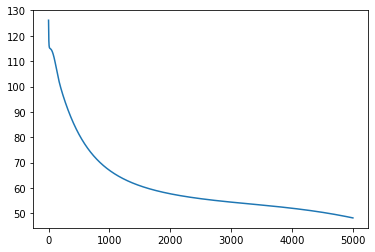

In [28]:
# print(losses)
plt.plot(losses)
plt.show()

In [29]:
print(f"Accuracy for training data: {round(tp/len(X_train), 2)*100}%")

Accuracy for training data: 90.0%


## For test data

In [30]:
loss = 0
tp_test = 0
for i in range(len(X_test)):
    x = X_test.iloc[i:i+1, :].to_numpy()
    target = y_test.to_numpy()
    y = []
    if target[i] == 0:
        y = [1, 0, 0]
    elif target[i] == 1:
        y = [0, 1, 0]
    elif target[i] == 2:
        y = [0, 0, 1]


    #network forward pas
    y_hat, z1 = forward_pass(x, W1, b1, W2, b2)
    
    print(f"{np.argmax(y_hat)} \ {np.argmax(y)}")
    
    if np.argmax(y_hat) == np.argmax(y):
        tp_test += 1
        
#     print(W2)

0 \ 0
2 \ 1
0 \ 0
0 \ 0
2 \ 2
2 \ 2
2 \ 2
0 \ 0
0 \ 0
2 \ 1
0 \ 0
2 \ 2
0 \ 0
2 \ 2
2 \ 2
0 \ 0
2 \ 2
0 \ 0
1 \ 1
0 \ 0
1 \ 1
1 \ 1
0 \ 0
0 \ 0
1 \ 1
0 \ 0
2 \ 1
2 \ 1
0 \ 0
2 \ 1
1 \ 1
2 \ 1
1 \ 1
2 \ 2
0 \ 0
0 \ 0
2 \ 2
1 \ 1
2 \ 2
1 \ 1
2 \ 2
2 \ 2
2 \ 1
2 \ 2
0 \ 0


In [31]:
print(f"Accuracy for test data: {round(tp_test/len(X_test), 2)*100}%")

Accuracy for test data: 84.0%
